In [2]:
import sys
import os
import pickle
import numpy as np


directory = "/home/xilun/vla-clip/clip_verifier/augmented_datasets"
# loop through all the files in the directory
new_data = {}
for file in os.listdir(directory):
    if file.endswith('.pkl'):
        with open(os.path.join(directory, file), 'rb') as f:
            data = pickle.load(f)
        # loop through all the keys in the data
        for key in data.keys():
            # if a number is in the key, remove every character before the number and include the number
            if any(char.isdigit() for char in key):
                # detect the number
                number = ''.join(char for char in key if char.isdigit())
                print ("number", number, "key", key)
                new_key = key[key.index(number):]
                new_key = new_key.replace(number, '')
                # Remove leading space if present
                while new_key.startswith(' '):
                    new_key = new_key[1:]
                new_data[new_key] = data[key]

    print (new_data.keys(), "for file", file)
    # # remove the file
    # os.remove(os.path.join(directory, file))
    # # save the data
    # with open(os.path.join(directory, file), 'wb') as f:
    #     pickle.dump(data, f)
            


number 3 key LIVING ROOM SCENE3 pick up the tomato sauce and put it in the tray demo
number 3 key LIVING ROOM SCENE3 pick up the tomato sauce and place it in the tray demo
number 3 key LIVING ROOM SCENE3 pick up the tomato sauce and remove it from the tray demo
number 3 key LIVING ROOM SCENE3 do not pick up the tomato sauce and put it in the tray demo
number 3 key LIVING ROOM SCENE3 grab the pasta condiment and place it within the demonstration container.
number 3 key LIVING ROOM SCENE3 lift the tomato condiment and place it in the container demo
number 4 key STUDY SCENE4 pick up the book in the middle and place it on the cabinet shelf demo
number 4 key STUDY SCENE4 pick up the book in the middle and position it on the cabinet shelf demo
number 4 key STUDY SCENE4 put down the book in the middle and place it on the cabinet shelf demo
number 4 key STUDY SCENE4 lift the publication located centrally and position it atop the cupboard demonstration.
number 4 key EXAMINE SCENE4 lift the nove

ValueError: substring not found

Loading dataset from libero_spatial_all.pkl...
Dataset loaded. Processing actions...
Action dimension determined: 7
Total positive action timesteps: 249000
Total negative action timesteps: 124500
Generating plots...


/tmp/ipykernel_4021406/2871857236.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=combined_df, x='Category', y=dim_name, ax=ax,
/tmp/ipykernel_4021406/2871857236.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=combined_df, x='Category', y=dim_name, ax=ax,
/tmp/ipykernel_4021406/2871857236.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=combined_df, x='Category', y=dim_name, ax=ax,
/tmp/ipykernel_4021406/2871857236.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

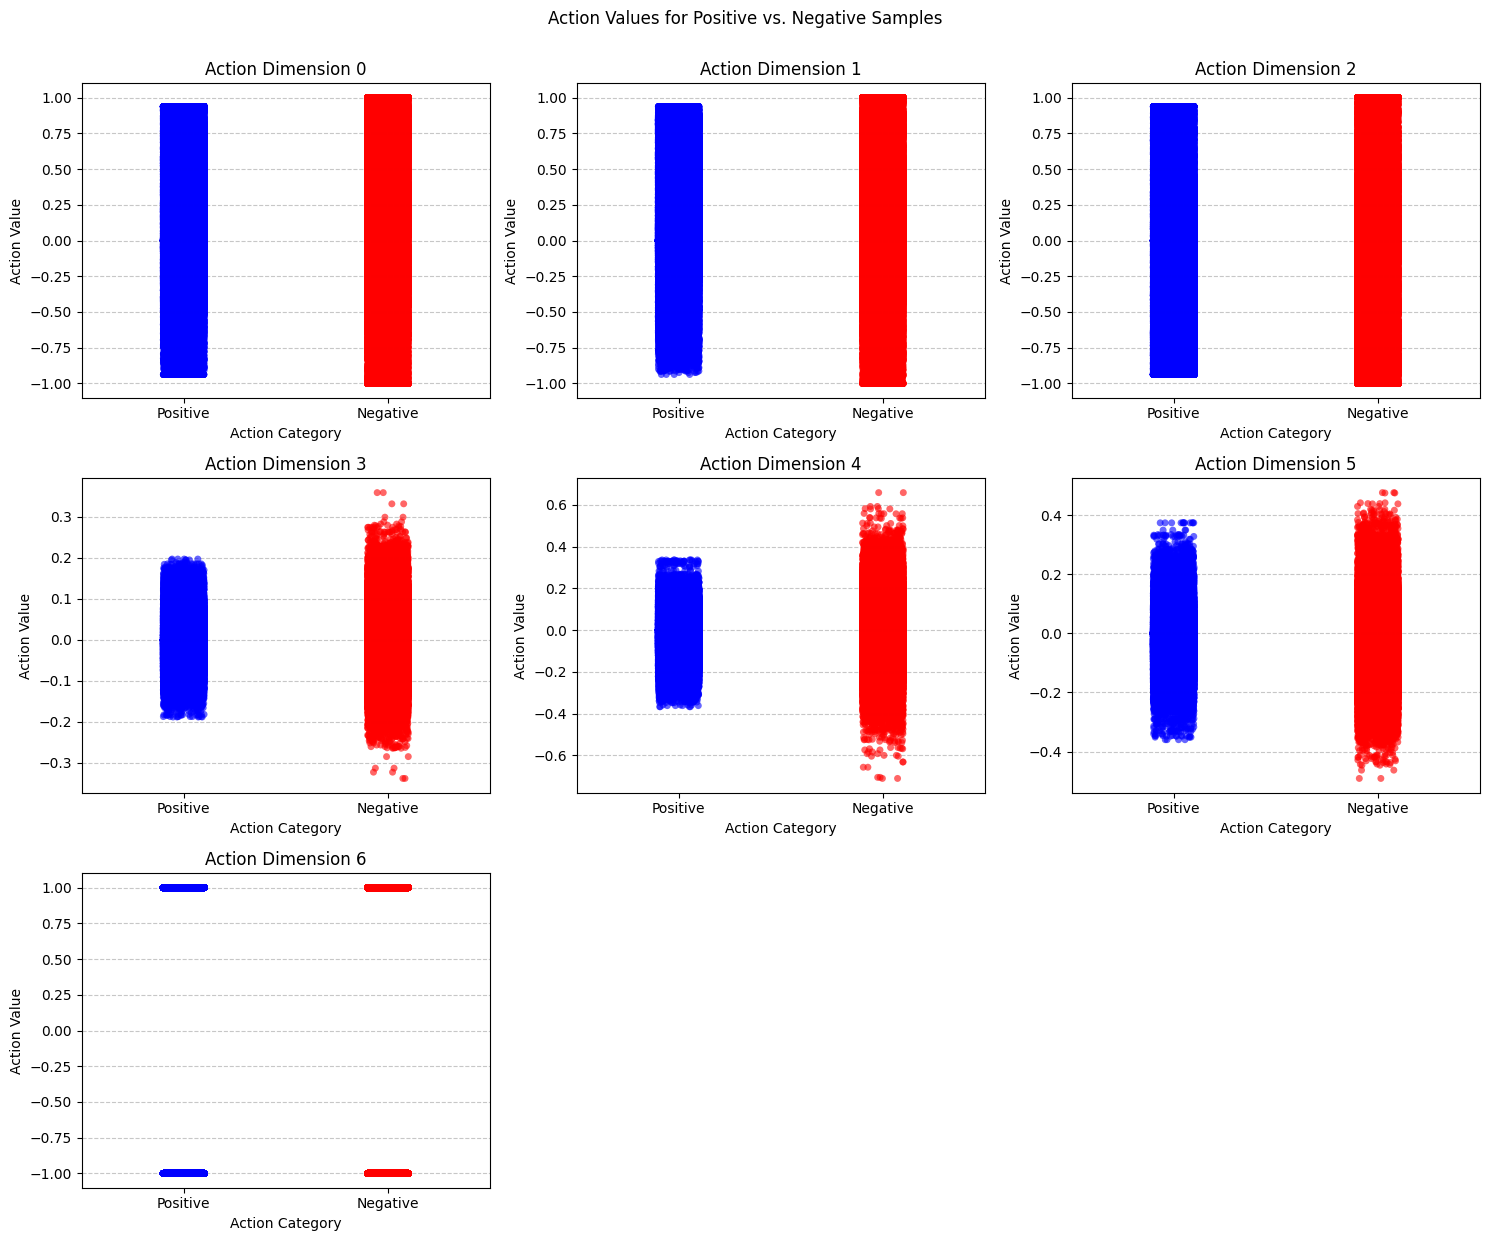

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd # Import pandas for easier handling with seaborn plots

def plot_action_points_notebook(data_path):
    """
    Loads the augmented dataset and plots the individual action points 
    for positive vs negative samples for each dimension in a notebook.
    
    Args:
        data_path: Path to the saved .pkl dataset file.
    """
    print(f"Loading dataset from {data_path}...")
    if not os.path.exists(data_path):
        print(f"Error: Data file not found at {data_path}")
        return
        
    try:
        with open(data_path, 'rb') as f:
            augmented_dataset = pickle.load(f)
    except Exception as e:
        print(f"Error loading pickle file: {e}")
        return

    print("Dataset loaded. Processing actions...")
    
    all_positive_actions = []
    all_negative_actions = []
    action_dim = None

    # Find action dimension efficiently
    first_valid_item = next(((inst, dat) for inst, dat in augmented_dataset.items() 
                             if 'actions' in dat and isinstance(dat['actions'], list) and dat['actions'] and 
                             isinstance(dat['actions'][0], np.ndarray) and dat['actions'][0].ndim == 2), 
                            None)
    if first_valid_item:
        action_dim = first_valid_item[1]['actions'][0].shape[1]
        print(f"Action dimension determined: {action_dim}")
    else:
        print("Error: Could not determine action dimension.")
        return

    # Collect actions
    for instruction, data in augmented_dataset.items():
        is_original = data.get('is_original', False)
        is_positive_transform = data.get('is_positive', None) 
        
        if 'actions' not in data or not isinstance(data['actions'], list): continue

        current_actions = data['actions']
        target_list = None
        if is_original or is_positive_transform is True: target_list = all_positive_actions
        elif is_positive_transform is False: target_list = all_negative_actions
        else: continue 

        for action_seq in current_actions:
            if isinstance(action_seq, np.ndarray) and action_seq.ndim == 2 and action_seq.shape[1] == action_dim:
                target_list.append(action_seq)

    if not all_positive_actions and not all_negative_actions:
        print("No valid positive or negative actions found to plot.")
        return
        
    # Concatenate all time steps
    positive_actions_flat = np.concatenate(all_positive_actions, axis=0) if all_positive_actions else np.array([])
    negative_actions_flat = np.concatenate(all_negative_actions, axis=0) if all_negative_actions else np.array([])

    if positive_actions_flat.size == 0 and negative_actions_flat.size == 0:
         print("Error: No valid action data points found.")
         return
         
    print(f"Total positive action timesteps: {positive_actions_flat.shape[0]}")
    print(f"Total negative action timesteps: {negative_actions_flat.shape[0]}")

    # --- Create a Pandas DataFrame for easier plotting with Seaborn ---
    data_frames = []
    if positive_actions_flat.size > 0:
        df_pos = pd.DataFrame(positive_actions_flat, columns=[f'dim_{i}' for i in range(action_dim)])
        df_pos['Category'] = 'Positive'
        data_frames.append(df_pos)
        
    if negative_actions_flat.size > 0:
        df_neg = pd.DataFrame(negative_actions_flat, columns=[f'dim_{i}' for i in range(action_dim)])
        df_neg['Category'] = 'Negative'
        data_frames.append(df_neg)

    if not data_frames:
        print("No data to plot after creating dataframes.")
        return
        
    combined_df = pd.concat(data_frames, ignore_index=True)

    # --- Plotting ---
    num_dims = action_dim
    cols = int(np.ceil(np.sqrt(num_dims)))
    rows = int(np.ceil(num_dims / cols))
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), squeeze=False) # Adjusted figsize
    axes = axes.flatten() 

    print("Generating plots...")
    for i in range(num_dims):
        ax = axes[i]
        dim_name = f'dim_{i}'
        
        # Use stripplot for visualizing individual points with jitter
        sns.stripplot(data=combined_df, x='Category', y=dim_name, ax=ax, 
                      jitter=True, alpha=0.6, # Add jitter and transparency
                      palette={'Positive': 'blue', 'Negative': 'red'}, # Color by category
                      order=['Positive', 'Negative'] # Ensure consistent order
                     ) 
        
        ax.set_title(f'Action Dimension {i}')
        ax.set_xlabel('Action Category') # X-axis shows the category
        ax.set_ylabel('Action Value')   # Y-axis shows the action value
        ax.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines

    # Hide any unused subplots
    for i in range(num_dims, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.suptitle("Action Values for Positive vs. Negative Samples", y=1.03) # Adjusted title position
    plt.show() # Display the plot inline

# --- How to use in a Jupyter cell ---
# 1. Make sure matplotlib, seaborn, and pandas are installed
# 2. Define the path to your data file
# Make sure this path points to the dataset generated with the per-timestep logic
data_file_path = 'libero_spatial_all.pkl' # <-- CHANGE THIS TO YOUR FILE PATH 

# 3. Call the function
plot_action_points_notebook(data_file_path)